# AI-Enabled FinTech B2B Invoice Management Application

In [12]:
# Importing all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


# This will avoid unwanted warnings
pd.options.mode.chained_assignment = None   

In [13]:
# reading the dataframe

dataset = pd.read_csv('H2HBABBA2680.csv')

In [14]:
# Printing first five rows from the dataframe

dataset.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR trust,NaN,2020,1930817908,23-04-2020,20200422,20200423,20200508,USD,RV,1,NaN,15030.19,20200423,NAH4,1.930818e+09,1
1,U001,200763152,PERFOR corp,13-02-2020 00:00,2020,1930430023,28-01-2020,20200122,20200128,20200212,USD,RV,1,NaN,13726.43,20200128,NAA8,1.930430e+09,0
2,U001,200769623,WAL-MAR us,15-04-2019 00:00,2019,1929077830,04-04-2019,20190403,20190404,20190419,USD,RV,1,NaN,39098.63,20190404,NAH4,1.929078e+09,0
3,U001,200778998,CE llc,17-12-2019 00:00,2019,1930205165,02-12-2019,20191130,20191202,20191217,USD,RV,1,NaN,47487.35,20191202,NAA8,1.930205e+09,0
4,U001,200707005,KING S systems,26-07-2019 00:00,2019,1929594438,11-07-2019,20190709,20190711,20190726,USD,RV,1,NaN,83720.75,20190711,NAA8,1.929594e+09,0


In [15]:
# Shape of dataframe (to see total number of rows and columns in the dataset)

dataset.shape

(50000, 19)

In [5]:
# Printing information of dataset

dataset.info

<bound method DataFrame.info of       business_code cust_number       name_customer        clear_date  \
0              U001   200769623       WAL-MAR trust               NaN   
1              U001   200763152         PERFOR corp  13-02-2020 00:00   
2              U001   200769623          WAL-MAR us  15-04-2019 00:00   
3              U001   200778998              CE llc  17-12-2019 00:00   
4              U001   200707005      KING S systems  26-07-2019 00:00   
...             ...         ...                 ...               ...   
49995          U001   200769623  WAL-MAR associates               NaN   
49996          U001   200700919           US  trust  13-05-2019 00:00   
49997          U001   200769623       WAL-MAR trust  28-05-2019 00:00   
49998          U001   200706844        WINC systems  20-09-2019 00:00   
49999          U001   200761734       H E BUT trust  24-01-2019 00:00   

       buisness_year      doc_id posting_date  document_create_date  \
0               2020

In [6]:
# Every column in dataset 

dataset.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [7]:
# Splitting the dataframe into main_train and main_test dataframe using groupby

grouped = dataset.groupby('isOpen')   #(0 & 1) in the column isOpen represents not-null and null values respectively. 
main_train = grouped.get_group(0)
main_test = grouped.get_group(1)

In [8]:
# Shape of main_train and main_test set

main_train.shape, main_test.shape

((40000, 19), (10000, 19))

In [8]:
data = pd.DataFrame()

In [11]:
data = main_train[0:9999]

In [12]:
data.to_csv("data.csv")

# Data Preprocessing:

In [9]:
#Removing Constant Columns, means Columns which have the same value in the main_train has to be removed

unique_cols =  [a for a in main_train.columns if main_train[a].nunique()==1] 
print(unique_cols)
main_train.drop(unique_cols,axis=1,inplace=True)
main_train.columns

['posting_id', 'isOpen']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date1', 'due_in_date', 'invoice_currency',
       'document type', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id'],
      dtype='object')

In [10]:
# Finding & Removing duplicate records

main_train.duplicated().sum()
main_train=main_train.drop_duplicates(keep='first')

In [11]:
# Dimension of main_train after removing duplicate rows/columns and constant columns

main_train.shape

(39132, 17)

In [12]:
# Sum of null values in columns in main_train

main_train.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                   0
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date1        0
due_in_date                  0
invoice_currency             0
document type                0
area_business            39132
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   2
dtype: int64

In [80]:
# Data types of each variable from the main_train

main_train.dtypes

business_code                    object
cust_number                      object
name_customer                    object
clear_date               datetime64[ns]
buisness_year                     int64
doc_id                            int64
posting_date             datetime64[ns]
document_create_date     datetime64[ns]
document_create_date1    datetime64[ns]
due_in_date              datetime64[ns]
invoice_currency                 object
document type                    object
total_open_amount               float64
baseline_create_date     datetime64[ns]
cust_payment_terms               object
invoice_id                      float64
delay                             int64
dtype: object

In [81]:
# Fill missing values in 'invoice_id' column with the mode of it's value

main_train['invoice_id'].fillna(main_train['invoice_id'].mode()[0], inplace=True)

In [15]:
# Drop all null columns (columns which do not contain any values has to be removed from dataset)

main_train.dropna(axis=1,how='all',inplace=True)

In [16]:
# Sum of null values in columns in dataset

main_train.isnull().sum()

business_code            0
cust_number              0
name_customer            0
clear_date               0
buisness_year            0
doc_id                   0
posting_date             0
document_create_date     0
document_create_date1    0
due_in_date              0
invoice_currency         0
document type            0
total_open_amount        0
baseline_create_date     0
cust_payment_terms       0
invoice_id               0
dtype: int64

In [17]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39132 entries, 1 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   business_code          39132 non-null  object 
 1   cust_number            39132 non-null  object 
 2   name_customer          39132 non-null  object 
 3   clear_date             39132 non-null  object 
 4   buisness_year          39132 non-null  int64  
 5   doc_id                 39132 non-null  int64  
 6   posting_date           39132 non-null  object 
 7   document_create_date   39132 non-null  int64  
 8   document_create_date1  39132 non-null  int64  
 9   due_in_date            39132 non-null  int64  
 10  invoice_currency       39132 non-null  object 
 11  document type          39132 non-null  object 
 12  total_open_amount      39132 non-null  float64
 13  baseline_create_date   39132 non-null  int64  
 14  cust_payment_terms     39132 non-null  object 
 15  in

In [18]:
# Converting dates from object data type to datetime data type

main_train['clear_date'] = pd.to_datetime(dataset.clear_date)
main_train['posting_date'] = pd.to_datetime(dataset.posting_date)
main_train['document_create_date'] = pd.to_datetime(main_train['document_create_date'], format= '%Y%m%d')
main_train['document_create_date1'] = pd.to_datetime(main_train['document_create_date1'], format= '%Y%m%d')
main_train['due_in_date'] = pd.to_datetime(main_train['due_in_date'], format= '%Y%m%d')
main_train['baseline_create_date'] = pd.to_datetime(main_train['baseline_create_date'], format= '%Y%m%d')

In [19]:
# Sort values of 'posting_date' in ascending order of train data

main_train.sort_values(by=['posting_date'],inplace=True)

### Spliting main_train into train, test and validation set

In [20]:
# Creating a new column with delay (This column will contain the number of days the customer delayed for the payment)
# delay = clear_date - due_in_date
# Then change the data type of delay column from timedelta to int

main_train['delay'] = (main_train.clear_date) - (main_train.due_in_date)
main_train['delay'] = pd.to_numeric(main_train['delay'])

In [50]:
# Split target column from main_train test

a = main_train.drop(['delay'],axis=1)
b = main_train['delay']

In [51]:
# Split the main_train set into train, validation and test set (70-20-10 %)

a_train, a_val_test, b_train, b_val_test = train_test_split(a, b, test_size=0.3, random_state=0, shuffle=False)
a_val, a_test, b_val, b_test = train_test_split(a_val_test, b_val_test, test_size=0.1, random_state=0, shuffle=False)
a_train.shape, a_val.shape, a_test.shape, b_train.shape, b_val.shape, b_test.shape

((27392, 16), (10566, 16), (1174, 16), (27392,), (10566,), (1174,))

# EDA

c:\users\shishir\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\shishir\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

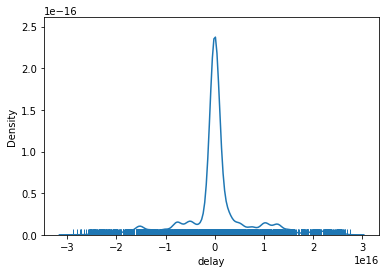

In [73]:
sns.distplot(b_train, rug=True, hist=False)

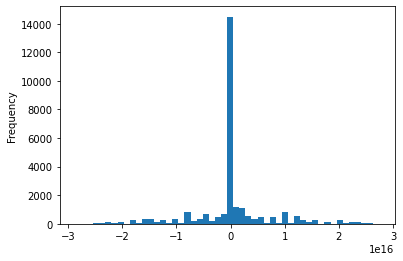

In [53]:
# Histogram of b_train
b_train.plot.hist(stacked=True, bins=50);

<AxesSubplot:>

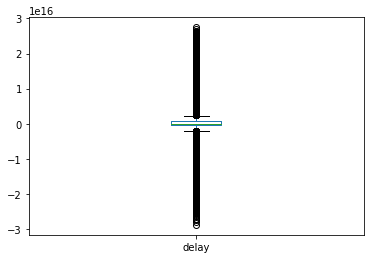

In [54]:
# Box plot of y_train dataset

b_train.plot.box()

# Feature Engineering

In [55]:
# Datatypes of a_train, a_val and a_test

a_train.dtypes, a_val.dtypes, a_test.dtypes

(business_code                    object
 cust_number                      object
 name_customer                    object
 clear_date               datetime64[ns]
 buisness_year                     int64
 doc_id                            int64
 posting_date             datetime64[ns]
 document_create_date     datetime64[ns]
 document_create_date1    datetime64[ns]
 due_in_date              datetime64[ns]
 invoice_currency                 object
 document type                    object
 total_open_amount               float64
 baseline_create_date     datetime64[ns]
 cust_payment_terms               object
 invoice_id                      float64
 dtype: object,
 business_code                    object
 cust_number                      object
 name_customer                    object
 clear_date               datetime64[ns]
 buisness_year                     int64
 doc_id                            int64
 posting_date             datetime64[ns]
 document_create_date     datetime64[ns]


In [56]:
a_train.dtypes

business_code                    object
cust_number                      object
name_customer                    object
clear_date               datetime64[ns]
buisness_year                     int64
doc_id                            int64
posting_date             datetime64[ns]
document_create_date     datetime64[ns]
document_create_date1    datetime64[ns]
due_in_date              datetime64[ns]
invoice_currency                 object
document type                    object
total_open_amount               float64
baseline_create_date     datetime64[ns]
cust_payment_terms               object
invoice_id                      float64
dtype: object

In [57]:
# Apply label encoding for a_train, a_val, a_test

a_train = a_train.apply(LabelEncoder().fit_transform)
a_val = a_val.apply(LabelEncoder().fit_transform)
a_test = a_test.apply(LabelEncoder().fit_transform)

In [29]:
# label encoding of x_train, x_val and x_test is now done

x_train.dtypes, x_val.dtypes, x_test.dtypes

(business_code            int32
 cust_number              int32
 name_customer            int32
 clear_date               int64
 buisness_year            int64
 doc_id                   int64
 posting_date             int64
 document_create_date     int64
 document_create_date1    int64
 due_in_date              int64
 invoice_currency         int32
 document type            int32
 total_open_amount        int64
 baseline_create_date     int64
 cust_payment_terms       int32
 invoice_id               int64
 dtype: object,
 business_code            int32
 cust_number              int32
 name_customer            int32
 clear_date               int64
 buisness_year            int64
 doc_id                   int64
 posting_date             int64
 document_create_date     int64
 document_create_date1    int64
 due_in_date              int64
 invoice_currency         int32
 document type            int32
 total_open_amount        int64
 baseline_create_date     int64
 cust_payment_terms     

# Feature Selection

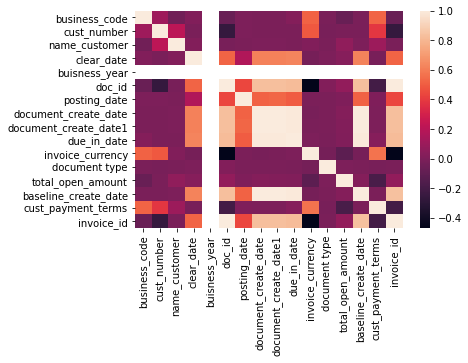

In [58]:
corrMatrix = a_train.corr()
sns.heatmap(corrMatrix)
plt.show()

In [59]:
a_train.drop('buisness_year', axis=1, inplace=True)
a_val.drop('buisness_year', axis=1, inplace=True)
a_test.drop('buisness_year', axis=1, inplace=True)

<AxesSubplot:>

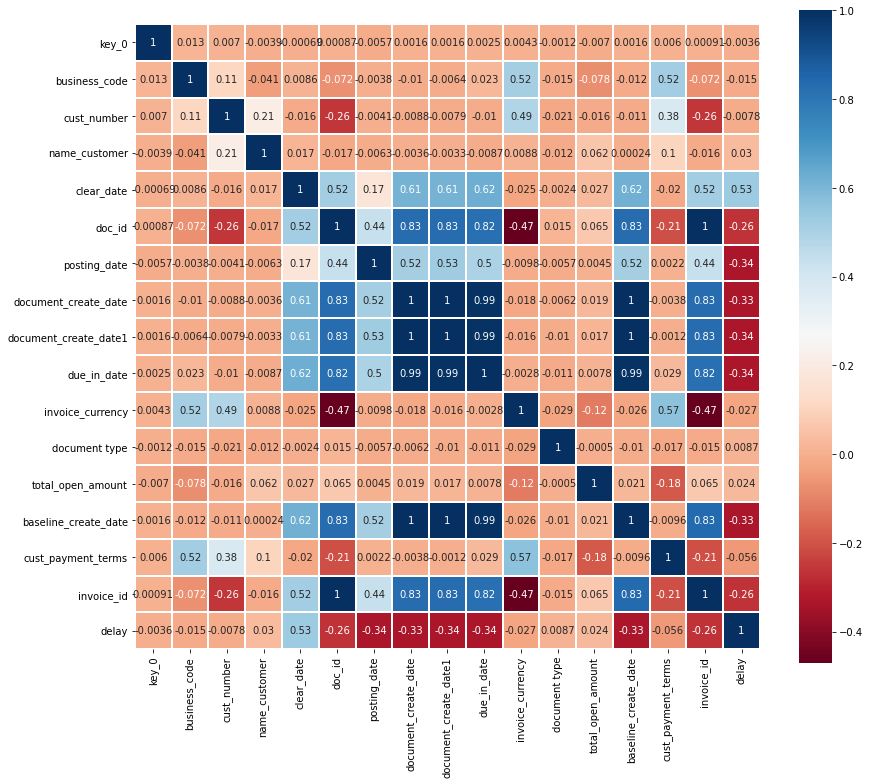

In [60]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
sns.heatmap(a_train.merge(b_train, on=a_train.index).corr(),
            linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [61]:
# Correlation between 'document_create_date' 'document_create_date1' and 'baseline_create_date' is strong and positive.
# So we can keep only one and can drop rest.
# Remove 'document_create_date' and 'baseline_create_date'

a_train.drop(['document_create_date', 'baseline_create_date'],axis=1, inplace = True)
a_val.drop(['document_create_date', 'baseline_create_date'],axis=1, inplace = True)
a_test.drop(['document_create_date', 'baseline_create_date'],axis=1, inplace = True)

# Modelling

In [62]:
lModel = LinearRegression()
lModel.fit(a_train,b_train)

LinearRegression()

In [63]:
prediction = lModel.predict(a_val)

In [64]:
pd.DataFrame(zip(b_val,prediction),columns=['actuals','predicted'])

,actuals,predicted
0,-86400000000000,4.666384e+15
1,86400000000000,4.883524e+15
2,777600000000000,5.410042e+15
3,432000000000000,5.094437e+15
4,345600000000000,4.991066e+15
...,...,...
10561,4579200000000000,7.656377e+15
10562,86400000000000,3.915222e+15
10563,20217600000000000,1.291522e+16
10564,86400000000000,3.914418e+15


In [65]:
mean_squared_error(b_val, prediction, squared=False)

5683708375709923.0

In [66]:
tmodel = DecisionTreeRegressor()
tmodel.fit(a_train, b_train)

DecisionTreeRegressor()

In [68]:
prediction2 = tmodel.predict(a_val)

In [69]:
mean_squared_error(b_val, prediction2, squared=False)

6443871756454237.0

In [70]:
prediction3 = tmodel.predict(a_test)

In [71]:
mean_squared_error(b_test,prediction3, squared=False)

3737666549779744.5

# Prediction on main test set

In [88]:
final_result = lModel.predict(main_test)

ValueError: could not convert string to float: 'U001'

In [89]:
final_result = pd.Series(final_result,name='clear date')

NameError: name 'final_result' is not defined

In [90]:
# Resetting index of main test set so that we can merge clear date series 
main_test.reset_index(drop=True,inplace=True)

In [91]:
Final = main_test.merge(final_result , on = main_test.index )
Final 

NameError: name 'final_result' is not defined